## 1. Загрузка библиотек и глобальных переменных

In [129]:
import pandas as pd
import math
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


pd.options.mode.chained_assignment = None
# обратите внимание, что Scikit-Learn импортируется как sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

In [130]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
df = pd.read_pickle('/content/drive/MyDrive/Yandex/filtered_df.pkl')

In [132]:
df

,user_id,region,device,channel,session_start,session_end,session_duration_sec,session_date,month,day,time_of_day,hour_of_day,payer,order_dt,revenue,payment_type,promo_code,final_sum
0,529697267522,united_states,iphone,социальные_сети,2019-05-01 00:06:40,2019-05-01 00:07:06,26,2019-05-01,5,3,ночь,0,True,2019-05-01 00:06:40,9999,mobile_payments,False,9999.0
1,601292388085,united_states,pc,органично,2019-05-01 06:56:16,2019-05-01 07:09:18,781,2019-05-01,5,3,утро,7,False,NaT,<NA>,NaN,<NA>,NaN
2,852898876338,united_states,mac,социальные_сети,2019-05-01 04:30:45,2019-05-01 04:34:56,251,2019-05-01,5,3,ночь,4,False,NaT,<NA>,NaN,<NA>,NaN
3,998513020664,united_states,iphone,социальные_сети,2019-05-01 18:53:42,2019-05-01 18:57:35,232,2019-05-01,5,3,вечер,18,False,NaT,<NA>,NaN,<NA>,NaN
4,240702200943,united_states,mac,социальные_сети,2019-05-02 14:04:32,2019-05-02 14:09:51,318,2019-05-02,5,4,день,14,False,NaT,<NA>,NaN,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,246163171672,united_states,iphone,социальные_сети,2019-10-29 18:12:24,2019-10-29 18:13:39,74,2019-10-29,10,2,вечер,18,False,NaT,<NA>,NaN,<NA>,NaN
1008,660140862425,germany,android,реклама_у_блогеров,2019-10-30 19:14:02,2019-10-30 19:46:19,1937,2019-10-30,10,3,вечер,19,False,NaT,<NA>,NaN,<NA>,NaN
1009,898253063062,france,iphone,органично,2019-10-30 03:18:22,2019-10-30 04:43:35,5113,2019-10-30,10,3,ночь,4,False,NaT,<NA>,NaN,<NA>,NaN
1010,780224321316,united_states,iphone,социальные_сети,2019-10-31 22:56:17,2019-10-31 23:42:27,2770,2019-10-31,10,4,ночь,23,False,NaT,<NA>,NaN,<NA>,NaN


### 2. Обработка данных



In [133]:
shop_region_channel = (
    df.groupby(["region", "channel"])[["final_sum", 'payer']].count().reset_index())

df_encoded = pd.get_dummies(shop_region_channel, columns=['region', 'channel'])
df_columns = df_encoded.columns.tolist()[1::]
shop_region_channel

,region,channel,final_sum,payer
0,france,email_рассылки,3,10
1,france,контекстная_реклама,13,44
2,france,органично,2,29
3,france,реклама_у_блогеров,6,17
4,germany,email_рассылки,1,5
5,germany,контекстная_реклама,9,42
6,germany,органично,8,34
7,germany,реклама_у_блогеров,6,20
8,united_kingdom,email_рассылки,2,7
9,united_kingdom,контекстная_реклама,14,51


# Построение модели регрессии


In [134]:
x_train, x_test, y_train, y_test = train_test_split(df_encoded[df_columns], df_encoded['final_sum'], test_size=0.2, random_state=42)
reg = LinearRegression().fit(x_train, y_train)
prediction = reg.predict(x_test)
prediction

array([ 0.89045913, 10.23623496, 11.41559423, 11.84344251])

In [135]:
r2 = round(r2_score(y_test, prediction.round(0)), 2)
mape = round(mean_absolute_percentage_error(y_test, prediction.round(0)) * 100, 2)

print(r2, mape)

0.49 36.32


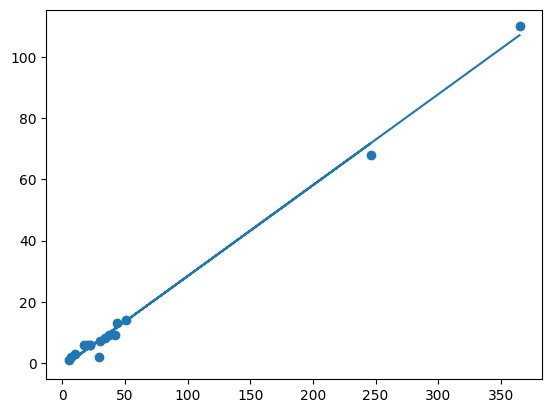

In [136]:
x = df_encoded.payer
y = df_encoded.final_sum
m, b = np.polyfit(x, y, 1)

plt.scatter (x, y)
plt.plot(x, m*x+b)

# Очень странное предскание, но точность большая....


In [137]:
shop_region_channel = df[["region", "channel", "final_sum"]]
shop_region_channel['final_sum'] = shop_region_channel['final_sum'].fillna (0)

df_cnt = shop_region_channel[['region', 'channel']]
df_cnt['payer'] = 1
df_cnt = df_cnt.groupby(['region', 'channel'], as_index=False).agg('sum')

# Соединяем 2 датасета
shop_region_channel = shop_region_channel.merge(df_cnt, how='right', on=['region', 'channel'])
shop_region_channel

,region,channel,final_sum,payer
0,france,email_рассылки,5999.0,10
1,france,email_рассылки,0.0,10
2,france,email_рассылки,5999.0,10
3,france,email_рассылки,0.0,10
4,france,email_рассылки,0.0,10
...,...,...,...,...
976,united_states,социальные_сети,0.0,365
977,united_states,социальные_сети,4499.1,365
978,united_states,социальные_сети,4999.0,365
979,united_states,социальные_сети,0.0,365


In [138]:
train, test = train_test_split(shop_region_channel, test_size=0.2)
train.shape, test.shape

((784, 4), (197, 4))

In [139]:
categorial_features = ['channel', 'region']  # категориальные признаки
real_features = ['final_sum']  # вещественные признаки
target_feature = 'payer'  # целевой признак

In [140]:
# for hue in categorial_features:
#     g = sns.PairGrid(train[['final_sum', 'payer', hue]],
#                      hue=hue, diag_sharey=False, height=3)

#     g.map_lower(sns.kdeplot, alpha=0.6)
#     g.map_upper(plt.scatter, alpha=0.3)
#     g.map_diag(sns.kdeplot, lw=3, alpha=0.6,
#                common_norm=False)  # каждая плотность по отдельности должна давать 1 при интегрировании

#     g.add_legend()

In [141]:
encoder = OneHotEncoder(drop='first', sparse=False)  # объявляем модель
train_cat = encoder.fit_transform(train[categorial_features])  # обучаем и кодируем
X_train = np.hstack([train[real_features], train_cat])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [142]:
model = LinearRegression(fit_intercept=True)  # объявляем модель
model.fit(X_train, train[target_feature])  # обучаем

LinearRegression()

In [143]:
# Кодируем категориальные признаки с помощью метода transform обученного ранее кодировщика
test_cat = encoder.transform(test[categorial_features])

# Соединяем данные
X_test = np.hstack([test[real_features], test_cat])

In [144]:
test_preds = model.predict(X_test)

In [145]:
r2 = round(r2_score(test['payer'], test_preds.round(0)), 2)
mape = round(mean_absolute_percentage_error(test['payer'], test_preds.round(0)) * 100, 2)

print(r2, mape)

0.94 64.61


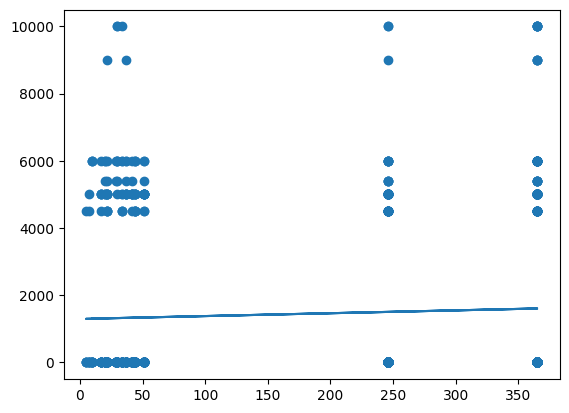

In [146]:
x = shop_region_channel.payer
y = shop_region_channel.final_sum
m, b = np.polyfit(x, y, 1)

plt.scatter (x, y)
plt.plot(x, m*x+b)